In [1]:
! gdown https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.5MB/s]


# Exercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

def load_data_from_file(file_name = "advertising.csv"):
    data = np.genfromtxt(file_name, delimiter = ",", skip_header = 1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    features_X = np.insert(features_X, 0, values = 1, axis = 1)

    return features_X, sales_Y

features_X, sales_Y = load_data_from_file()
print(features_X.shape)
print(sales_Y.shape)

print(features_X[:5, :])
print(sales_Y.shape)

(200, 4)
(200,)
[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


# Exercise 2

In [4]:
def create_individual(n=4, bound=10):
    individual = []

    for _ in range(n):
        individual.append((random.random()*2-1)*bound/2)

    return individual

individual = create_individual()
print(individual)

[0.1127472136860852, -0.9506586254958571, 2.837985890347726, -1.9668727392107255]


# Exercise 3

In [5]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()

    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (1 + loss)

    return fitness

## Question 4

In [6]:
features_X, sales_Y = load_data_from_file()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


# Exercise 4

In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() <= crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

## Question 5

In [9]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print(individual1)
print(individual2)

[3.44, 2.57, -0.79, -2.41]
[4.09, 4.82, 3.1, 4.02]


# Exercise 5

In [10]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = (random.random()*2-1)  #gia tri dot bien duoc tinh ntn?

    return individual_m

## Question 6

In [11]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


# Exercise 6

In [12]:
def initializePopulation(m):
    population = []

    for _ in range(m):
        individual = create_individual()
        population.append(individual)

    return population

# Exercise 7

In [13]:
def selection(sorted_old_population, m = 100):
    index1 = random.randint(0, m-1)

    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

# Exercise 8

In [14]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key = compute_fitness)

    #if gen%1 == 0:
    #    print("Best loss: ", compute_loss(sorted_population[m -1]), " with chromsome: ", sorted_population[m -1])

    new_population = []

    while len(new_population) < (m - elitism):
        #selection
        parent1 = selection(sorted_population)
        parent2 = selection(sorted_population)
        #crossover
        child1, child2 = crossover(parent1, parent2)
        #mutation
        child1 = mutate(child1)
        child2 = mutate(child2)

        new_population.append(child1)
        new_population.append(child2)

    #copy elitism chromosomes that have best fitness score to the next generation
    for ind in (sorted_population[m - elitism:]):
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m -1])

In [15]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population , _ = create_new_population(old_population, elitism=2 , gen=1)
print(old_population)
print(new_population)
print(_)

[[4.09, 4.82, 3.1, 4.02], [3.44, 2.57, -0.79, -2.41]]
[[4.09, 4.82, 3.1, 4.02], [3.44, 2.57, -0.79, -2.41]]
123415.051528805


# Exercise 9

In [16]:
def run_GA():
    n_generations = 100
    m = 600

    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)

    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)

    return losses_list, population


# Excercise 10

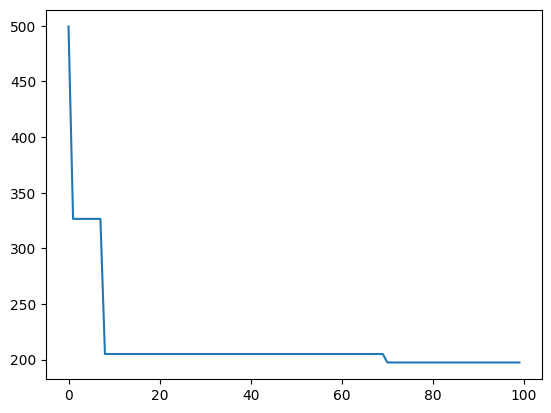

In [17]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

# Exercise 11

[-0.7270321186076223, -0.029302340626511825, 0.05776658455082351, 0.578160085636207]


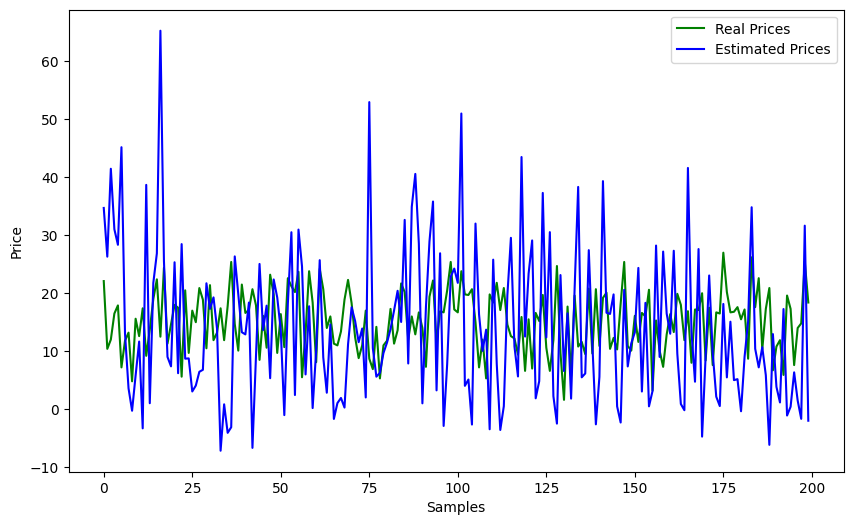

In [18]:
def visualize_predict_gt():
    sorted_population = sorted(population, key = compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_prices.append(feature.dot(theta))

    fig, ax = plt.subplots(figsize= (10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c = 'green', label = 'Real Prices')
    plt.plot(estimated_prices, c = 'blue' , label = 'Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()
